# **Kredi Tahmini AI/ML Sınıflandırma  Modeli**

In [190]:
## EDA işlemi gerçekleştirmek için gerekli kütüphaneler import edilir ve veri hakkında daha fazla bilgi edinilir.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler

## Tüm satır ve sütunların görünmesi için bir pandas fonksiyonu ayarlanır.
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

# **EDA**

**Dosyayı İnceleme**

In [191]:
train = pd.read_csv('train2023.csv')
test = pd.read_csv('test2023.csv')
## datanın satır ve sütun yapısını getirir
print("train: ",train.shape)
print("test: ", test.shape)

train:  (4768, 14)
test:  (1192, 13)


In [192]:
train.head()

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0


In [193]:
test.head()

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,4768,22.065764,25800,NaN,63456.0,DebtCon,Other,25.0,0.0,0.0,148.816285,0.0,8.0
1,4769,20.380464,16400,62018.0,91832.0,DebtCon,ProfExe,9.0,0.0,0.0,202.322500,0.0,19.0
2,4770,29.476003,22400,18371.0,38311.0,DebtCon,Other,1.0,0.0,0.0,37.235000,2.0,3.0
3,4771,NaN,33400,59000.0,85000.0,HomeImp,Self,2.0,0.0,7.0,240.433333,3.0,26.0
4,4772,29.045964,23000,71902.0,101750.0,HomeImp,Other,5.0,0.0,0.0,214.389252,0.0,13.0


In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    4768 non-null   int64  
 1   DEBTINC  3741 non-null   float64
 2   LOAN     4768 non-null   int64  
 3   MORTDUE  4365 non-null   float64
 4   VALUE    4680 non-null   float64
 5   REASON   4568 non-null   object 
 6   JOB      4550 non-null   object 
 7   YOJ      4357 non-null   float64
 8   DEROG    4193 non-null   float64
 9   DELINQ   4300 non-null   float64
 10  CLAGE    4531 non-null   float64
 11  NINQ     4352 non-null   float64
 12  CLNO     4592 non-null   float64
 13  BAD      4768 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 521.6+ KB


In [195]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    1192 non-null   int64  
 1   DEBTINC  952 non-null    float64
 2   LOAN     1192 non-null   int64  
 3   MORTDUE  1077 non-null   float64
 4   VALUE    1168 non-null   float64
 5   REASON   1140 non-null   object 
 6   JOB      1131 non-null   object 
 7   YOJ      1088 non-null   float64
 8   DEROG    1059 non-null   float64
 9   DELINQ   1080 non-null   float64
 10  CLAGE    1121 non-null   float64
 11  NINQ     1098 non-null   float64
 12  CLNO     1146 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 121.2+ KB


# Veri setindeki değişken türlerini kontrol etme

In [196]:
# Veri setindeki değişken türlerini kontrol etme
numeric_features_train = train.select_dtypes(include=['float64', 'int64']) 
categorical_features_train = train.select_dtypes(include=['object']) 

numeric_features_test = test.select_dtypes(include=['float64', 'int64']) 
categorical_features_test = test.select_dtypes(include=['object']) 

# Sayısal değişkenlerin listesi
print("Train Sayısal Değişkenler :")
print(numeric_features_train.columns.tolist())
print("\nTest Sayısal Değişkenler :")
print(numeric_features_test.columns.tolist())

# Kategorik değişkenlerin listesi
print("\nTrain Kategorik Değişkenler:")
print(categorical_features_train.columns.tolist())
print("\nTest Kategorik Değişkenler:")
print(categorical_features_test.columns.tolist())


Train Sayısal Değişkenler :
['index', 'DEBTINC', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'BAD']

Test Sayısal Değişkenler :
['index', 'DEBTINC', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO']

Train Kategorik Değişkenler:
['REASON', 'JOB']

Test Kategorik Değişkenler:
['REASON', 'JOB']


In [197]:
for col in train.select_dtypes('O').columns:
    print('{} Tane Unique Değere Sahibiz. {} Sütunundaki Değerler : {}'.format(len(train[col].unique()),col,train[col].unique()))
    print('__'*30)

3 Tane Unique Değere Sahibiz. REASON Sütunundaki Değerler : ['DebtCon' nan 'HomeImp']
____________________________________________________________
7 Tane Unique Değere Sahibiz. JOB Sütunundaki Değerler : ['Mgr' 'Sales' 'Other' 'Office' nan 'Self' 'ProfExe']
____________________________________________________________


In [198]:
train.describe()

,index,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
count,4768.000000,3741.000000,4768.000000,4365.000000,4680.000000,4357.000000,4193.000000,4300.000000,4531.000000,4352.000000,4592.000000,4768.000000
mean,2383.500000,33.864152,18595.050336,74254.645874,102884.609090,8.868442,0.254472,0.458140,179.442286,1.181756,21.391551,0.200503
std,1376.547372,8.141801,11143.678091,44203.791750,58579.950268,7.535995,0.867605,1.124849,85.609878,1.733127,10.119090,0.400419
min,0.000000,0.720295,1300.000000,2063.000000,8800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1191.750000,29.220351,11100.000000,46775.000000,66527.000000,3.000000,0.000000,0.000000,115.543501,0.000000,15.000000,0.000000
50%,2383.500000,34.871855,16300.000000,65889.000000,89789.000000,7.000000,0.000000,0.000000,172.799301,1.000000,20.000000,0.000000
75%,3575.250000,39.077814,23400.000000,92613.000000,121733.500000,13.000000,0.000000,0.000000,230.711163,2.000000,26.000000,0.000000
max,4767.000000,144.189001,89900.000000,399412.000000,855909.000000,41.000000,10.000000,13.000000,1168.233561,17.000000,71.000000,1.000000


# Kategorik özelliklerin dağılımlarını inceleme

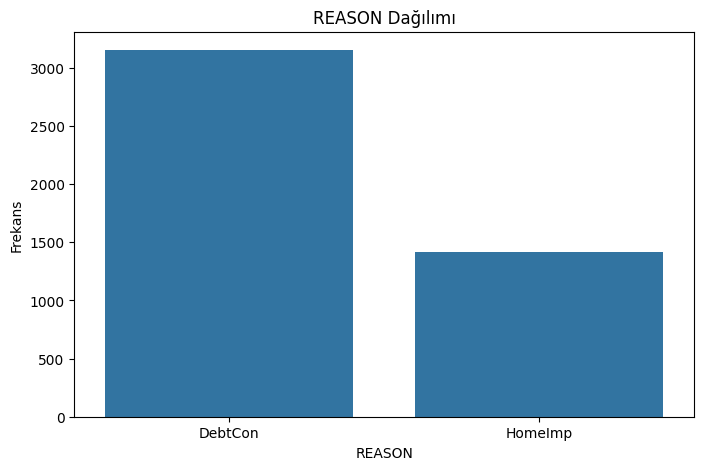

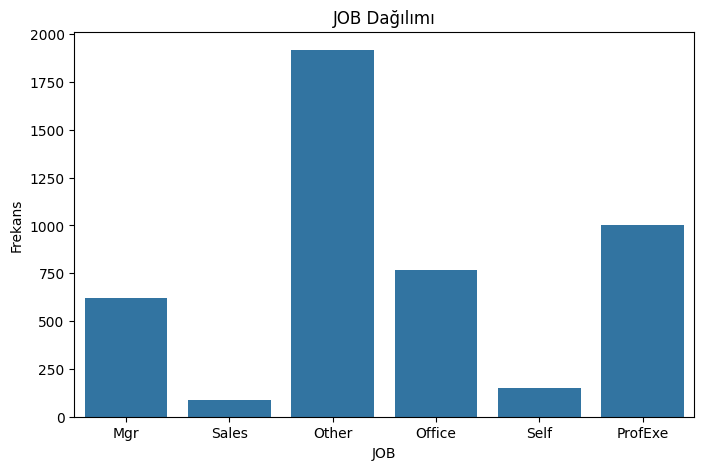

In [199]:
categorical_features = ['REASON', 'JOB']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=train)
    plt.title(f'{feature} Dağılımı')
    plt.xlabel(feature)
    plt.ylabel('Frekans')
    plt.show()

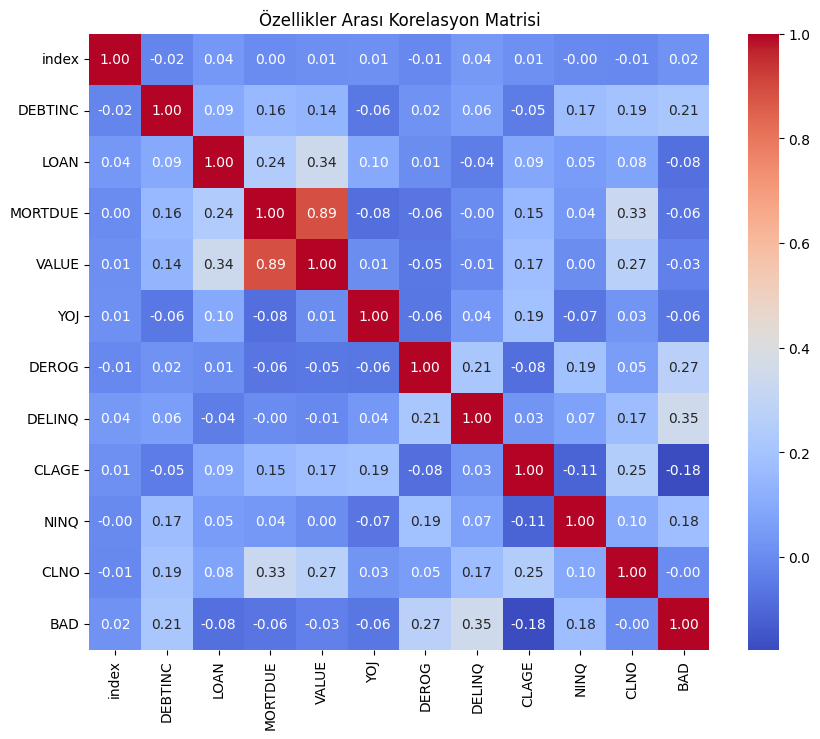

In [200]:
correlation_matrix = numeric_features_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()

## Outlier

### LOAN - VALUE

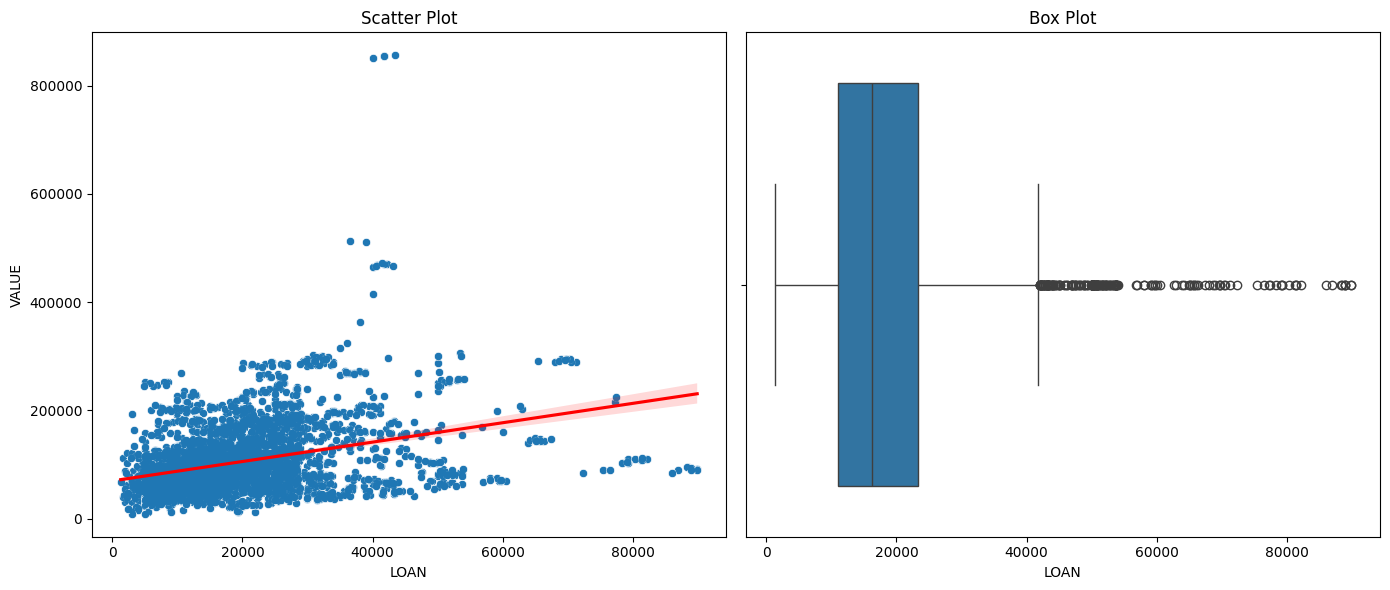

In [201]:
plt.figure(figsize=(14, 6), dpi=100)

# Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=train, x="LOAN", y="VALUE")
sns.regplot(data=train, x="LOAN", y="VALUE", scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter Plot')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=train, x="LOAN")
plt.title('Box Plot')


plt.tight_layout() 
plt.show()

In [202]:
train.query('VALUE > 450000')

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
373,373,43.730032,39000,399412.0,511164.0,DebtCon,ProfExe,5.0,0.0,0.0,181.962401,0.0,21.0,1
673,673,43.458327,36600,397299.0,512650.0,DebtCon,ProfExe,4.0,0.0,0.0,197.516684,0.0,21.0,1
959,959,42.603641,42300,367089.0,469771.0,HomeImp,ProfExe,3.0,0.0,0.0,310.051524,4.0,14.0,0
1070,1070,42.985408,43500,NaN,855909.0,HomeImp,Other,16.0,0.0,0.0,196.403636,0.0,23.0,1
1249,1249,41.723899,40700,371003.0,467818.0,HomeImp,ProfExe,1.0,0.0,0.0,316.604442,3.0,14.0,0
2081,2081,43.809292,41800,363737.0,469748.0,HomeImp,ProfExe,4.0,0.0,0.0,327.743755,4.0,14.0,0
2360,2360,42.071645,41700,NaN,854112.0,HomeImp,Other,16.0,0.0,0.0,180.608878,0.0,23.0,1
2716,2716,42.623574,43200,367917.0,466755.0,HomeImp,ProfExe,3.0,0.0,0.0,312.306339,4.0,15.0,0
3313,3313,NaN,40000,NaN,850000.0,HomeImp,Other,17.0,0.0,0.0,186.666667,1.0,24.0,1
3583,3583,NaN,40000,362000.0,465000.0,HomeImp,ProfExe,3.0,0.0,0.0,313.466667,4.0,15.0,0


1070, 2360, 3313, 3805

373, 673, 959, 1070, 1249, 2081, 2360, 2716, 3313, 3583, 3805, 3994, 4202, 5076, 5415, 5933

In [203]:
from scipy import stats

z_scores = stats.zscore(train['LOAN'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
outlier_indices = np.where(outliers)[0]

outlier_values = train['LOAN'].iloc[outlier_indices]
sorted_outlier_values_descending = outlier_values.sort_values(ascending=False)

print(sorted_outlier_values_descending)

2731    89900
1152    89800
3290    89000
3642    88900
1247    88900
2359    88500
3029    88300
1851    87000
3370    86000
3149    82200
4365    81400
3878    81400
3760    81200
4200    80300
4119    79200
4216    79200
4569    79100
1923    78400
4196    77400
3958    77200
3671    76500
2929    75400
1210    72300
1832    71200
2233    70500
3106    70300
3592    69700
3616    69700
4079    69600
505     69000
3082    68700
241     68100
3739    67400
2102    66400
2051    66000
2940    65800
1477    65800
3697    65500
1868    65200
3280    65100
1044    64900
772     64200
155     63900
2162    62900
2683    62700
2338    60500
3186    60000
3350    59800
2091    59700
454     59500
3249    59200
2017    59200
2569    58100
1128    58000
69      57000
2858    56800
4403    54000
4221    53900
2632    53800
1226    53800
4426    53700
2204    53700
1793    53700
2964    53700
4629    53600
2636    53500
2825    53400
208     53300
3034    53200
1056    53000
4250    52900
3943  

### CLAGE - DELINQ

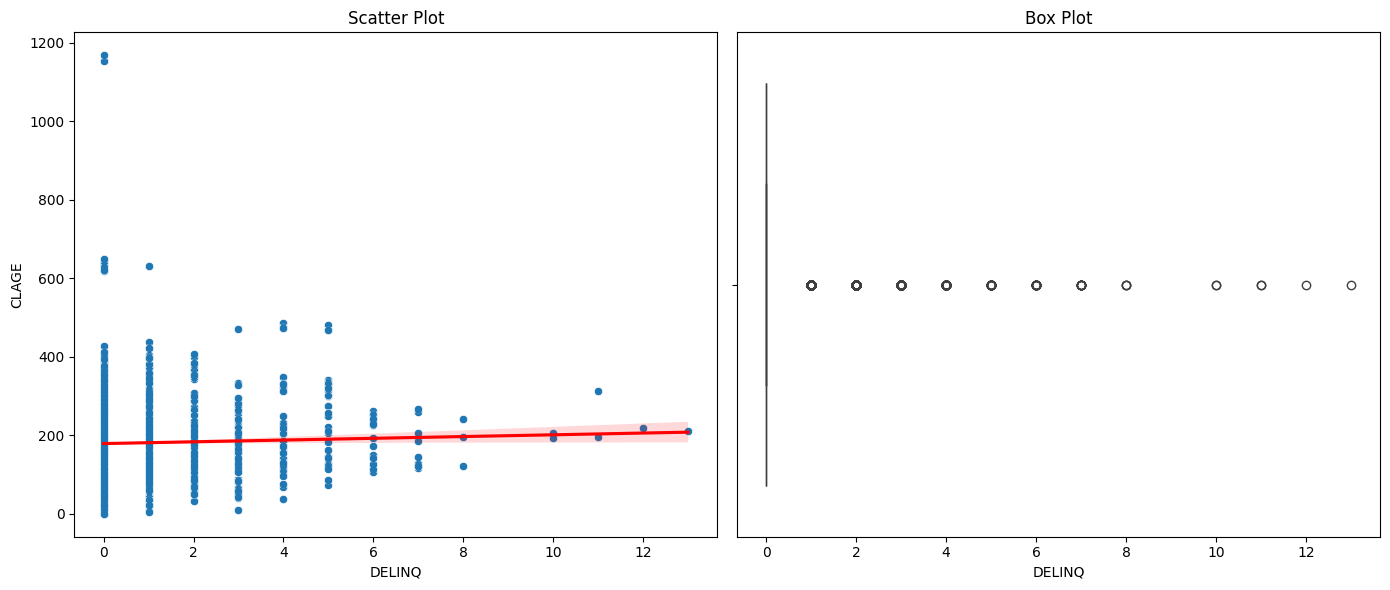

In [204]:
plt.figure(figsize=(14, 6), dpi=100)

# Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=train, x="DELINQ", y="CLAGE")
sns.regplot(data=train, x="DELINQ", y="CLAGE", scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter Plot')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=train, x="DELINQ")
plt.title('Box Plot')


plt.tight_layout() 
plt.show()

In [205]:
train.query('CLAGE > 1000')

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
2881,2881,NaN,16800,87300.0,155500.0,DebtCon,Other,3.0,0.0,0.0,1154.633333,0.0,0.0,1
3837,3837,40.206138,19300,96454.0,157809.0,DebtCon,Other,3.0,0.0,0.0,1168.233561,0.0,0.0,1


2881, 3837

### DEBTINC - LOAN

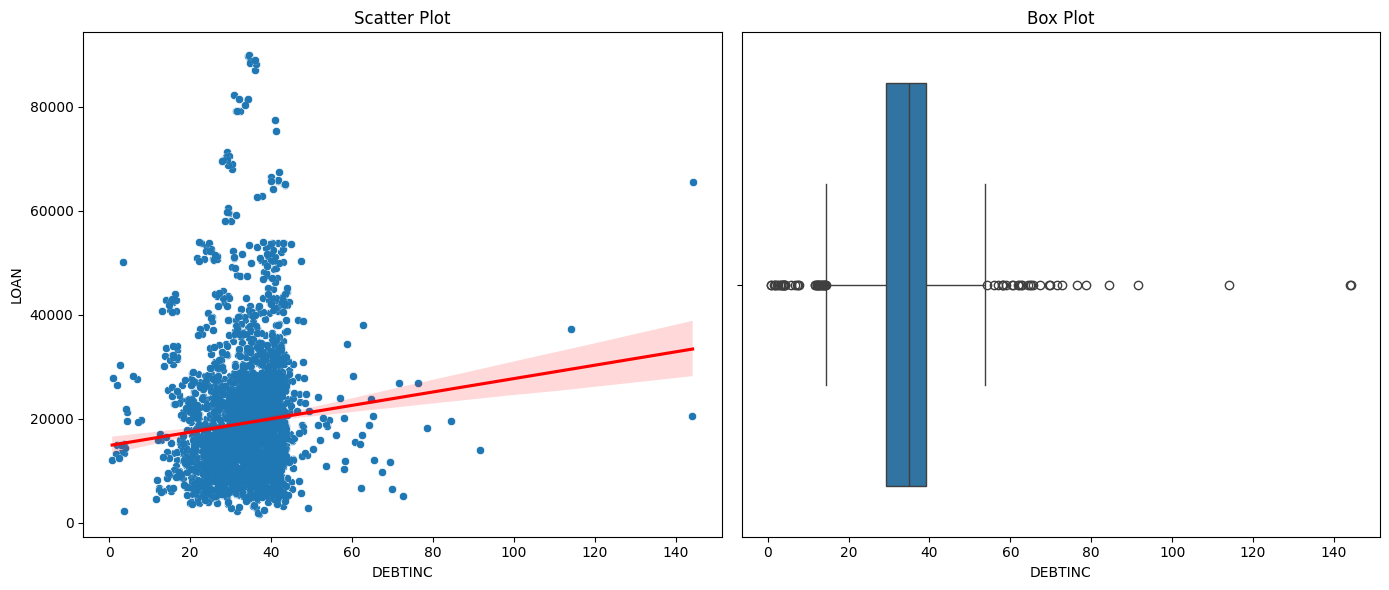

In [206]:
plt.figure(figsize=(14, 6), dpi=100)

# Scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=train, x="DEBTINC", y="LOAN")
sns.regplot(data=train, x="DEBTINC", y="LOAN", scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter Plot')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=train, x="DEBTINC")
plt.title('Box Plot')


plt.tight_layout() 
plt.show()

In [207]:
train.query('DEBTINC > 125 & LOAN < 30000')

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
518,518,143.949605,20500,113963.0,131135.0,HomeImp,Self,3.0,1.0,0.0,243.680604,1.0,26.0,1


518, 5116, 5630

## Outlierda Buldugumuz Degerleri Drop Ediyoruz

373, 673, 959, 1070, 1249, 2081, 2360, 2716, 3313, 3583, 3805, 3994, 4202, 2881, 3837, 518, 5630

5076, 5415, 5933, 5116, 5630

In [208]:
# Belirtilen indeksleri içeren bir liste
index_list = [373, 673, 959, 1070, 1249, 2081, 2360, 2716, 3313, 3583, 3805, 3994, 4202, 2881, 3837, 518]


# Veri çerçevesinden belirtilen indeksleri çıkart
train = train.drop(index=index_list)




## Veri Temizleme

In [209]:
null_df = round((train.isnull().sum().sort_values(ascending = False)/len(train.index)),2).to_frame().rename(columns={0:'Null values percentage'})[:15]

null_df

,Null values percentage
DEBTINC,0.22
DEROG,0.12
DELINQ,0.10
NINQ,0.09
YOJ,0.09
MORTDUE,0.08
CLAGE,0.05
JOB,0.05
REASON,0.04
CLNO,0.04


In [210]:
null_df_test = round((test.isnull().sum().sort_values(ascending = False)/len(test.index)),2).to_frame().rename(columns={0:'Null values percentage'})[:15]

null_df_test

,Null values percentage
DEBTINC,0.20
DEROG,0.11
MORTDUE,0.10
DELINQ,0.09
YOJ,0.09
NINQ,0.08
CLAGE,0.06
JOB,0.05
REASON,0.04
CLNO,0.04


Sayisallarda Null Degerler

In [211]:
null_num_train = pd.DataFrame(numeric_features_train.isnull().sum()[numeric_features_train.isnull().sum()>0]).sort_values(by=0, ascending=False)
null_num_train

,0
DEBTINC,1027
DEROG,575
DELINQ,468
NINQ,416
YOJ,411
MORTDUE,403
CLAGE,237
CLNO,176
VALUE,88


In [212]:
null_num_test = pd.DataFrame(numeric_features_test.isnull().sum()[numeric_features_test.isnull().sum()>0]).sort_values(by=0, ascending=False)
null_num_test

,0
DEBTINC,240
DEROG,133
MORTDUE,115
DELINQ,112
YOJ,104
NINQ,94
CLAGE,71
CLNO,46
VALUE,24


Kategoriklerde Null Degerler

In [213]:
null_cat_train = pd.DataFrame(categorical_features_train.isnull().sum()[categorical_features_train.isnull().sum()>0]).sort_values(by=0, ascending=False)
null_cat_train


,0
JOB,218
REASON,200


In [214]:
null_cat_test = pd.DataFrame(categorical_features_test.isnull().sum()[categorical_features_test.isnull().sum()>0]).sort_values(by=0, ascending=False)
null_cat_test

,0
JOB,61
REASON,52


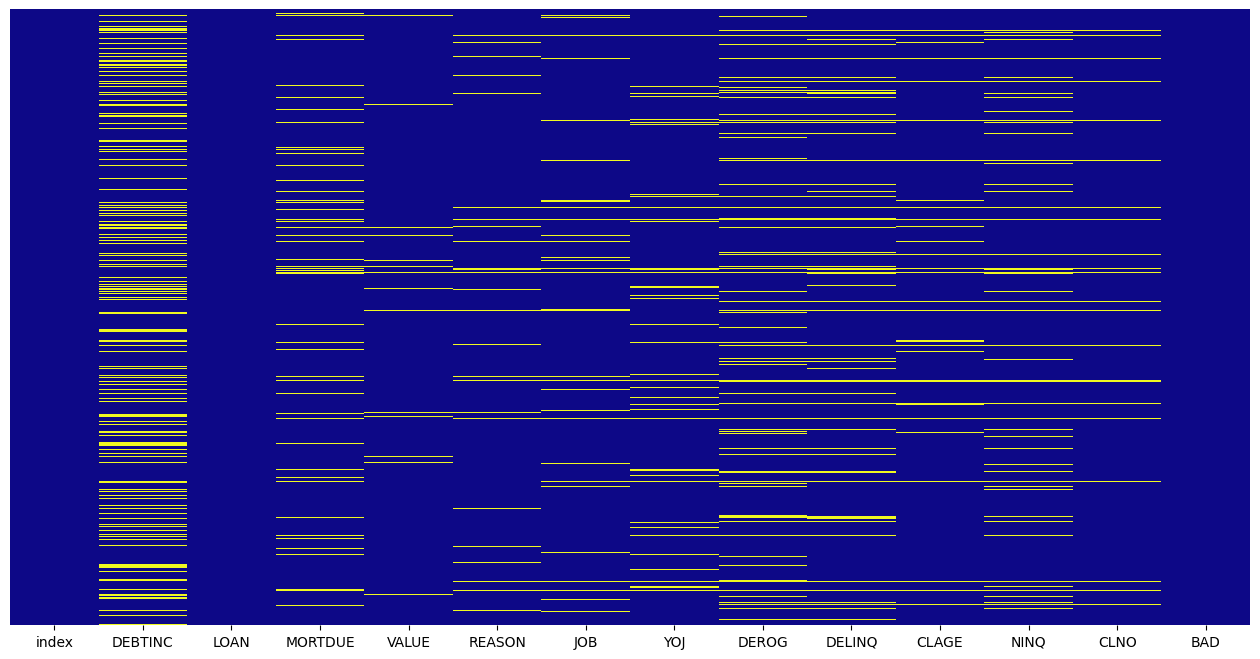

In [215]:
plt.rcParams["figure.figsize"] = (16, 8)
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="plasma");

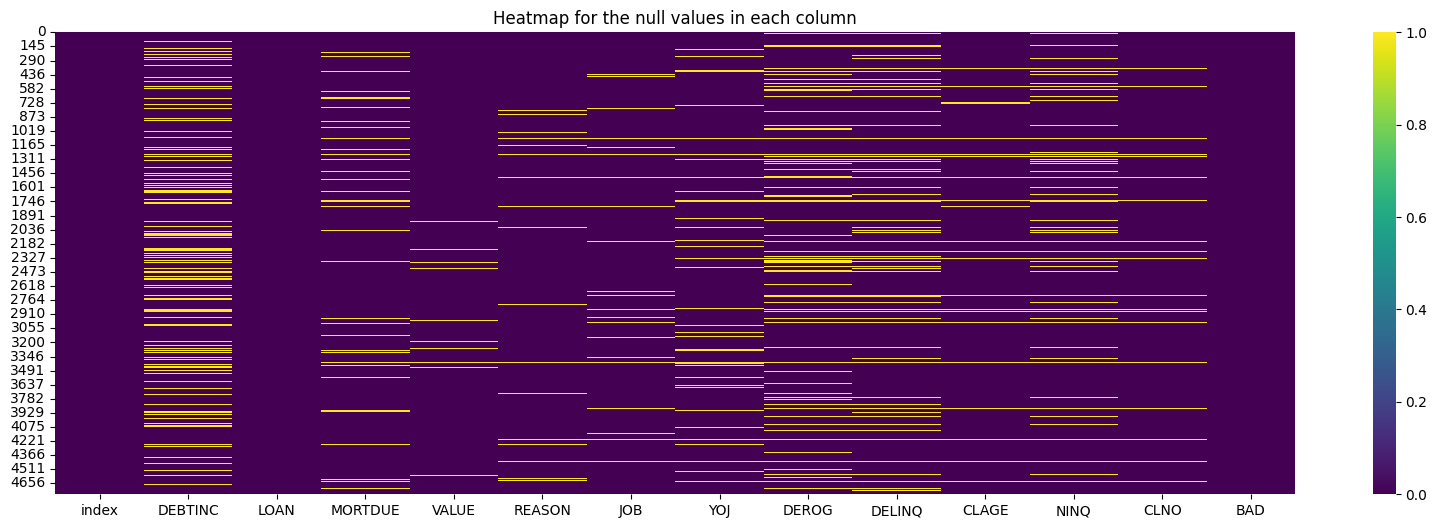

In [216]:
#Boyutunu Belirlemek icin
plt.figure(figsize=(20,6))
#Baslik kismi
plt.title('Heatmap for the null values in each column')
# Seaborn kütüphanesinin heatmap fonksiyonunu kullanarak null değerlerin varlığını gösteriyoruz.
sns.heatmap(train.isnull(),cmap='viridis');

## Null Degerleri Doldurma Islemi

In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4752 entries, 0 to 4767
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    4752 non-null   int64  
 1   DEBTINC  3728 non-null   float64
 2   LOAN     4752 non-null   int64  
 3   MORTDUE  4353 non-null   float64
 4   VALUE    4664 non-null   float64
 5   REASON   4552 non-null   object 
 6   JOB      4534 non-null   object 
 7   YOJ      4341 non-null   float64
 8   DEROG    4177 non-null   float64
 9   DELINQ   4284 non-null   float64
 10  CLAGE    4515 non-null   float64
 11  NINQ     4336 non-null   float64
 12  CLNO     4576 non-null   float64
 13  BAD      4752 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 556.9+ KB


In [218]:
train.head(10)

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0
5,5,NaN,12000,44000.0,59500.0,DebtCon,Other,3.7,0.0,0.0,172.500000,0.0,14.0,0
6,6,38.582670,12000,84172.0,123415.0,DebtCon,Office,9.0,0.0,0.0,139.018449,1.0,21.0,0
7,7,40.932767,11900,63833.0,NaN,DebtCon,Other,3.0,NaN,NaN,NaN,NaN,NaN,1
8,8,24.470300,13400,78465.0,97506.0,DebtCon,Other,5.0,3.0,0.0,71.443665,1.0,21.0,0
9,9,40.152144,18000,107546.0,176314.0,DebtCon,Office,6.0,0.0,0.0,218.019386,3.0,23.0,0


In [219]:
train["MORTDUE"] = train['MORTDUE'].fillna(0)
train["VALUE"] = train["VALUE"].fillna(0)
train["YOJ"] = train["YOJ"].fillna(0)
train["DEROG"] = train["DEROG"].fillna(0)
train["DELINQ"] = train["DELINQ"].fillna(0)
train["CLAGE"] = train["CLAGE"].fillna(0)
train["NINQ"] = train["NINQ"].fillna(0)
train["CLNO"] = train["CLNO"].fillna(0)
train["DEBTINC"] = train["DEBTINC"].fillna(0)

train['REASON'] = train['REASON'].fillna(train['REASON'].mode()[0])
train['JOB'] = train['JOB'].fillna(train['JOB'].mode()[0])

In [220]:
train.isnull().sum().max()

0

## SKEWNESS

In [221]:
from scipy.stats import skew
#Sayisal Sutunlara erismek icin
numeric_feats = train.dtypes[train.dtypes != "object"].index

#her bir sayısal özelliğin Skewness(çarpıklığını) hesaplamak için
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
DEROG,5.833258
DELINQ,4.062079
NINQ,2.791754
LOAN,2.015036
BAD,1.505601
VALUE,1.234488
YOJ,1.035201
MORTDUE,1.010970
CLAGE,0.560062
CLNO,0.546919


In [222]:
from scipy.special import boxcox1p
#çarpıklık değeri 0.75'ten büyük olan özellikleri seçer. 
#Bu eşik değeri (0.75), genellikle çarpıklık değerini düzeltebilecek bir dönüşüm sınırını temsil eder.
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index

#Box-Cox dönüşüm parametresi olan lambda (λ) değerini belirtir.
lam = 0.15

#Sutunlara Box-Cox dönüşümünü uygular.
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)

There are 12 skewed numerical features to Box Cox transform


## Encode

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4752 entries, 0 to 4767
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    4752 non-null   float64
 1   DEBTINC  4752 non-null   float64
 2   LOAN     4752 non-null   float64
 3   MORTDUE  4752 non-null   float64
 4   VALUE    4752 non-null   float64
 5   REASON   4752 non-null   object 
 6   JOB      4752 non-null   object 
 7   YOJ      4752 non-null   float64
 8   DEROG    4752 non-null   float64
 9   DELINQ   4752 non-null   float64
 10  CLAGE    4752 non-null   float64
 11  NINQ     4752 non-null   float64
 12  CLNO     4752 non-null   float64
 13  BAD      4752 non-null   float64
dtypes: float64(12), object(2)
memory usage: 556.9+ KB


In [224]:
train['BAD'] = train['BAD'].astype(object)
cat_columns_all_data = ["REASON", "JOB", "BAD"]

train = pd.get_dummies(train, columns=cat_columns_all_data, drop_first=True)

In [225]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4752 entries, 0 to 4767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   4752 non-null   float64
 1   DEBTINC                 4752 non-null   float64
 2   LOAN                    4752 non-null   float64
 3   MORTDUE                 4752 non-null   float64
 4   VALUE                   4752 non-null   float64
 5   YOJ                     4752 non-null   float64
 6   DEROG                   4752 non-null   float64
 7   DELINQ                  4752 non-null   float64
 8   CLAGE                   4752 non-null   float64
 9   NINQ                    4752 non-null   float64
 10  CLNO                    4752 non-null   float64
 11  REASON_HomeImp          4752 non-null   bool   
 12  JOB_Office              4752 non-null   bool   
 13  JOB_Other               4752 non-null   bool   
 14  JOB_ProfExe             4752 non-null   bool 

In [226]:
bool_columns = ["REASON_HomeImp", "JOB_Office", "JOB_Other", "JOB_ProfExe", "JOB_Sales", "JOB_Self", "BAD_0.7304631471189666"]
train[bool_columns] = train[bool_columns].astype(int)

In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4752 entries, 0 to 4767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   4752 non-null   float64
 1   DEBTINC                 4752 non-null   float64
 2   LOAN                    4752 non-null   float64
 3   MORTDUE                 4752 non-null   float64
 4   VALUE                   4752 non-null   float64
 5   YOJ                     4752 non-null   float64
 6   DEROG                   4752 non-null   float64
 7   DELINQ                  4752 non-null   float64
 8   CLAGE                   4752 non-null   float64
 9   NINQ                    4752 non-null   float64
 10  CLNO                    4752 non-null   float64
 11  REASON_HomeImp          4752 non-null   int32  
 12  JOB_Office              4752 non-null   int32  
 13  JOB_Other               4752 non-null   int32  
 14  JOB_ProfExe             4752 non-null   int32

## Logistic

In [228]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [230]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [231]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [232]:
y_pred = classifier.predict(X_test)

In [233]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.889589905362776

In [234]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[750  20]
 [ 85  96]]


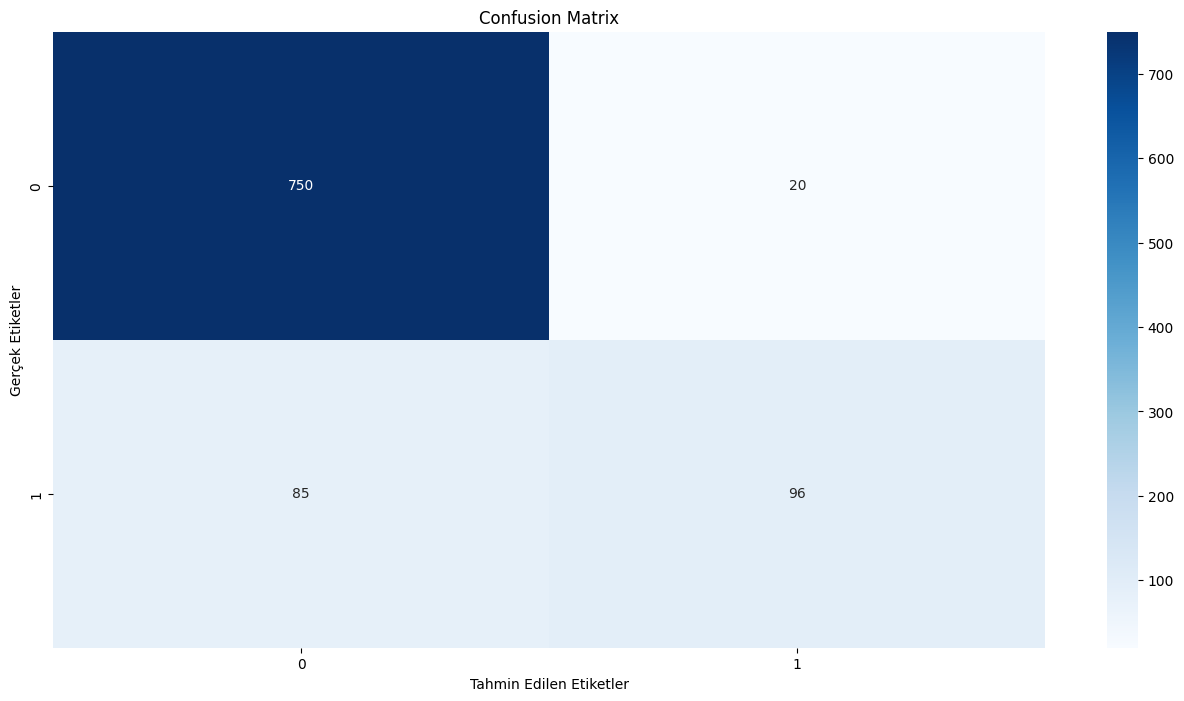

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [236]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)

Doğruluk: 0.889589905362776
Kesinlik: 0.8275862068965517
Hassasiyet: 0.5303867403314917
F1 Skoru: 0.6464646464646465


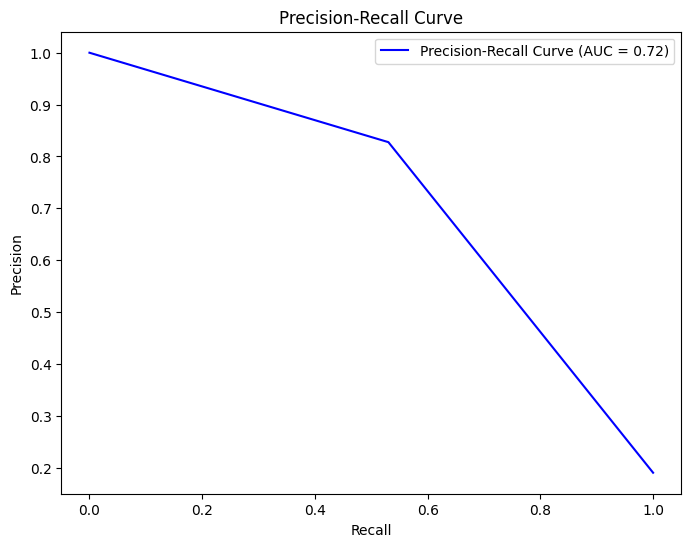

In [237]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

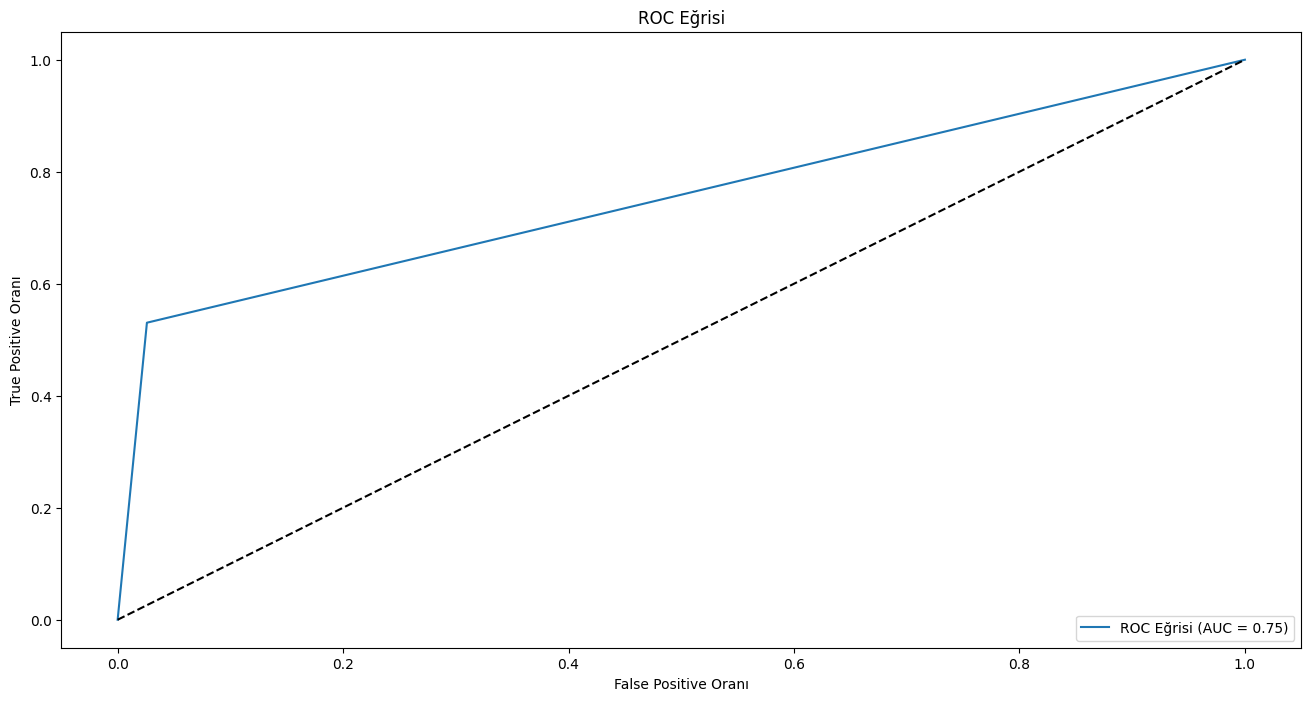

In [238]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC Eğrisi (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

## KNN

In [239]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [241]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [242]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [243]:
y_pred = classifier.predict(X_test)

In [244]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8958990536277602

In [245]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[757  13]
 [ 86  95]]


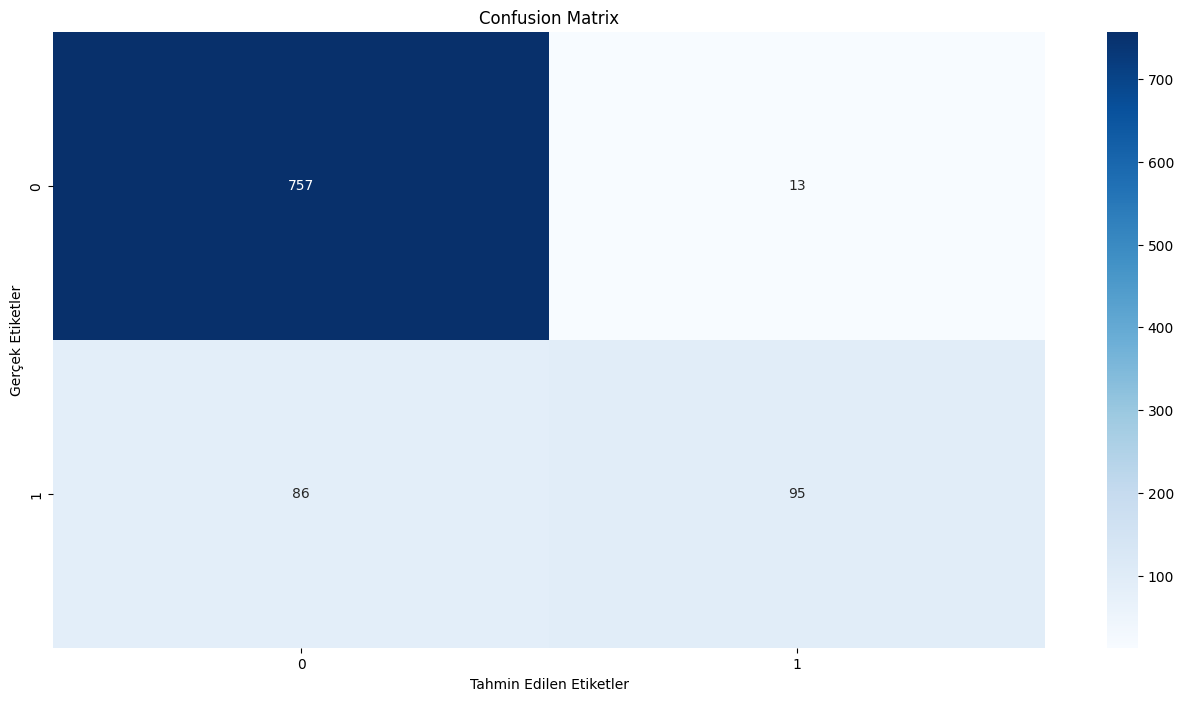

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [247]:
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)

Doğruluk: 0.8958990536277602
Kesinlik: 0.8796296296296297
Hassasiyet: 0.5248618784530387
F1 Skoru: 0.657439446366782


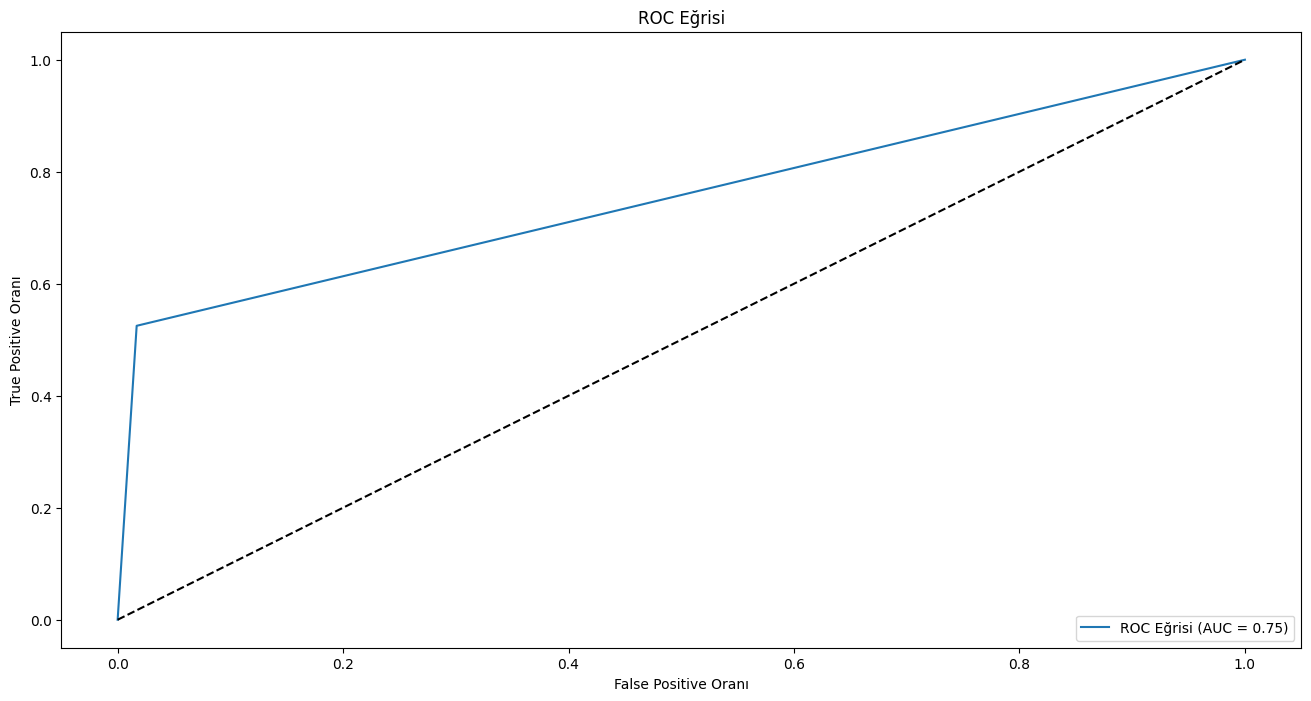

In [248]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC Eğrisi (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

## SVM

In [249]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [251]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [252]:
from sklearn.svm import SVC

# classifier'ı oluştur
#classifier = SVC(kernel = 'linear')
classifier = SVC(kernel = 'rbf')
#classifier = SVC(kernel = 'sigmoid')

# classifier'ı eğit
classifier.fit(X_train, y_train)

SVC()

In [253]:
y_pred = classifier.predict(X_test)

In [254]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

Doğruluk: 0.900105152471083


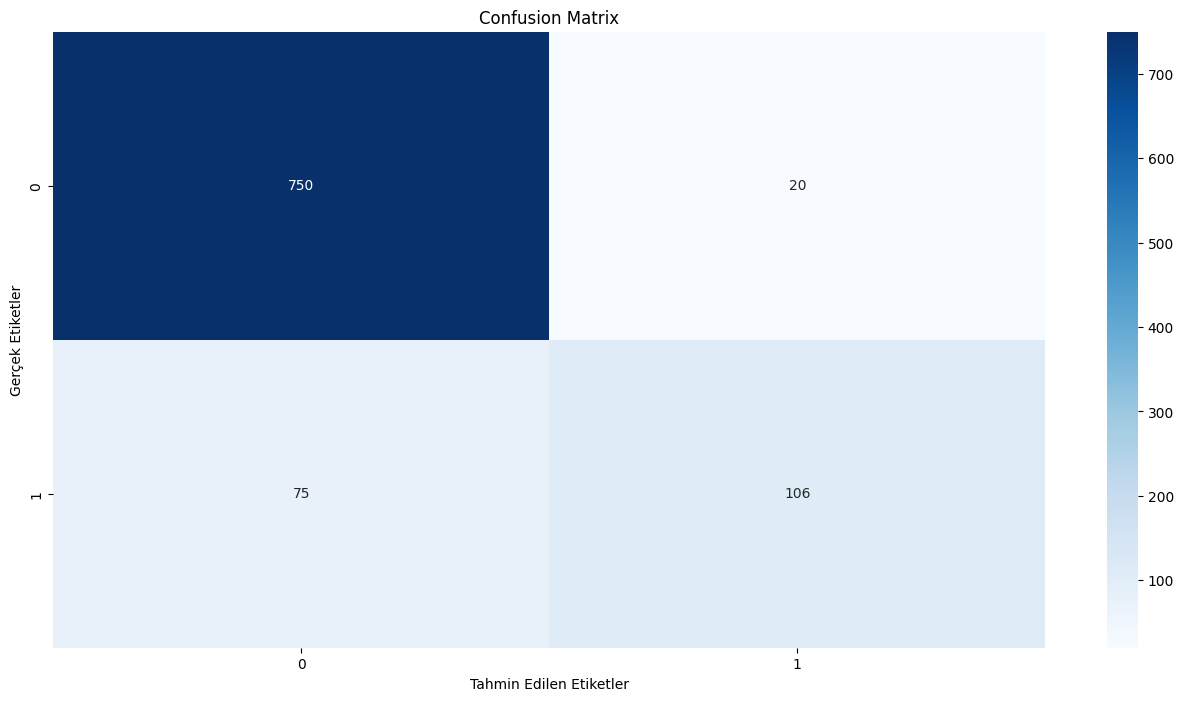

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [256]:
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)

Doğruluk: 0.900105152471083
Kesinlik: 0.8412698412698413
Hassasiyet: 0.585635359116022
F1 Skoru: 0.6905537459283387


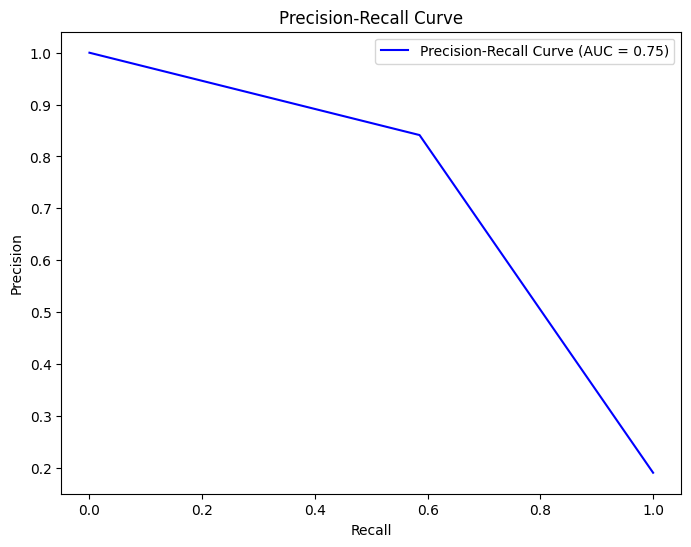

In [257]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

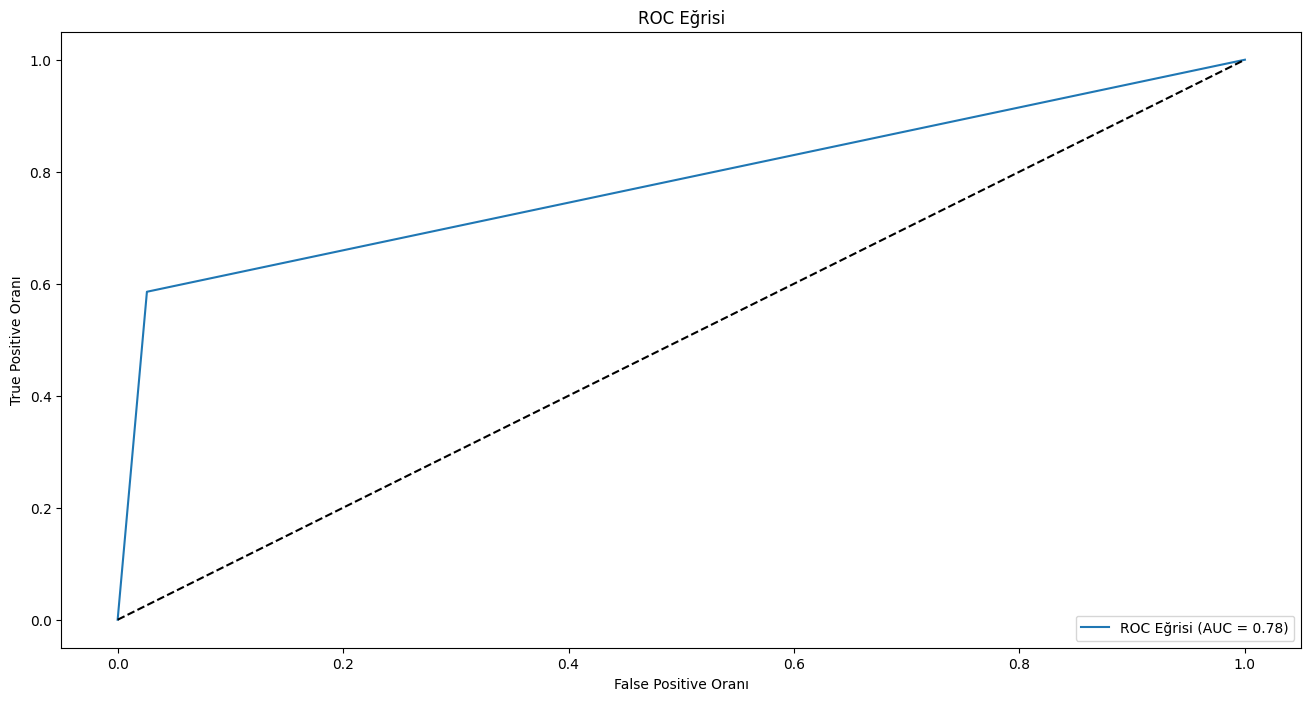

In [258]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC Eğrisi (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

In [259]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [261]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

classifier = GaussianNB()


classifier.fit(X_train, y_train)

GaussianNB()

In [262]:
y_pred = classifier.predict(X_test)

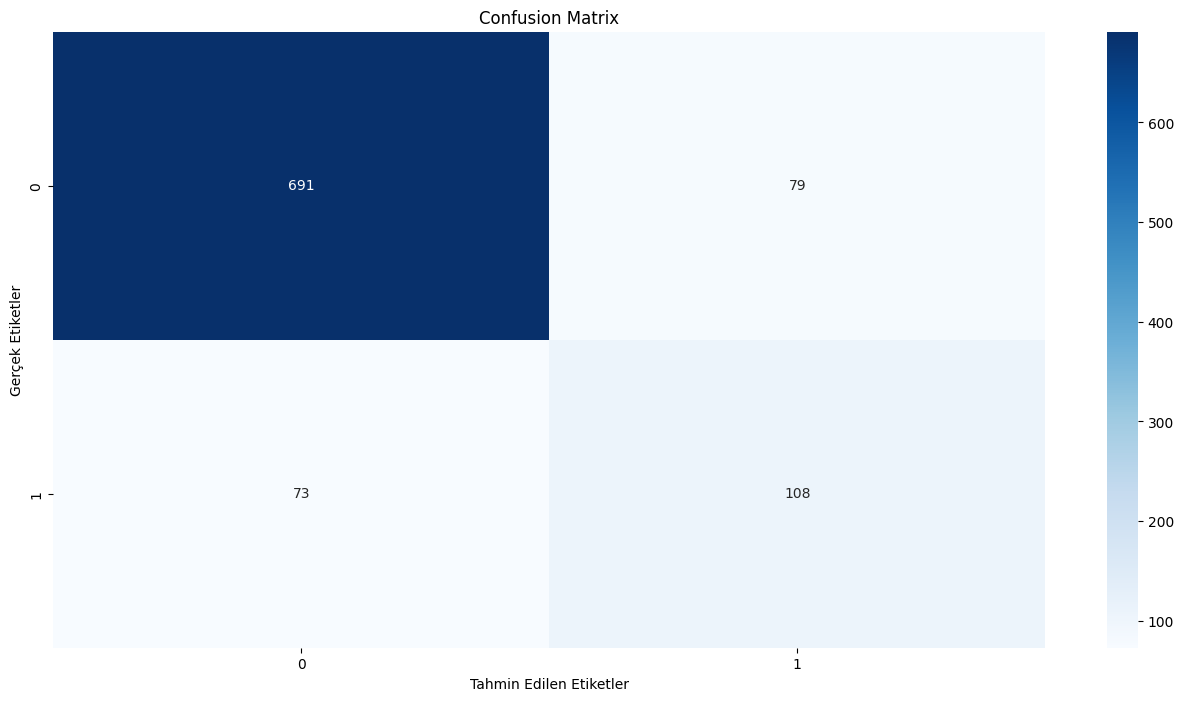

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [264]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

Doğruluk: 0.8401682439537329


In [265]:
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)

Doğruluk: 0.8401682439537329
Kesinlik: 0.5775401069518716
Hassasiyet: 0.5966850828729282
F1 Skoru: 0.5869565217391305


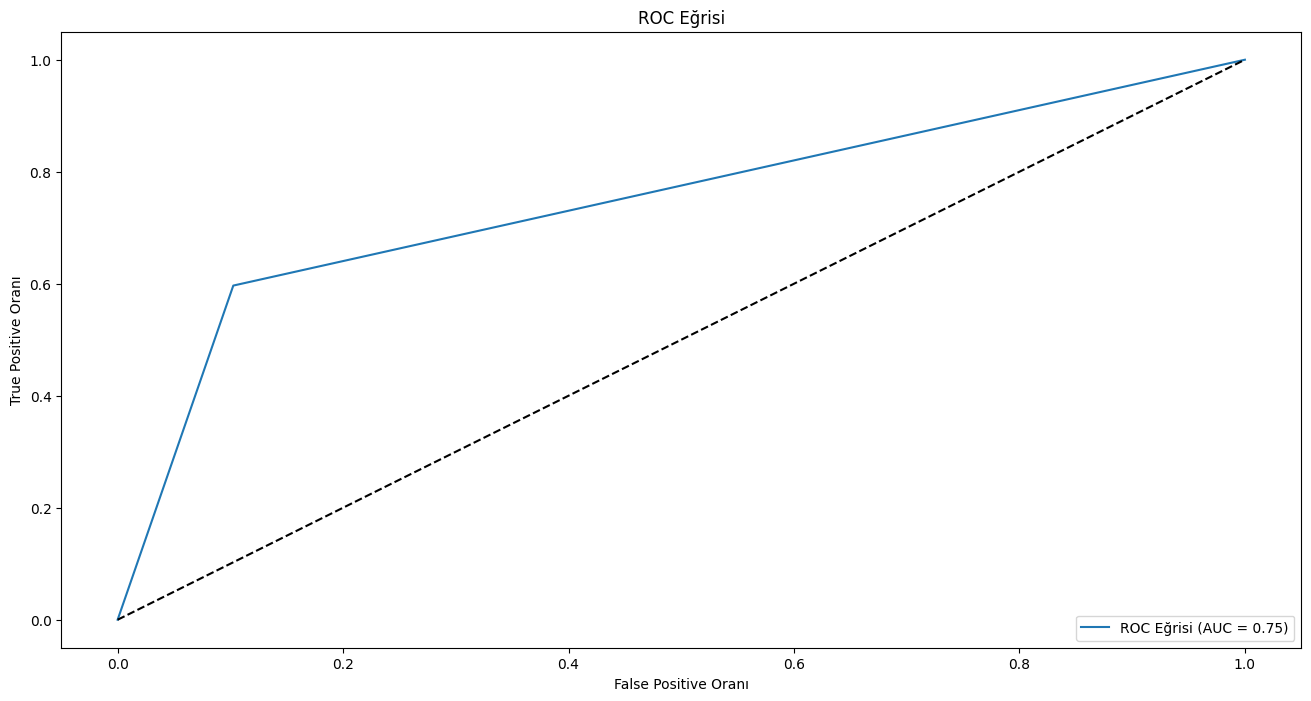

In [266]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC Eğrisi (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [267]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [269]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'gini')

classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [270]:
y_pred = classifier.predict(X_test)

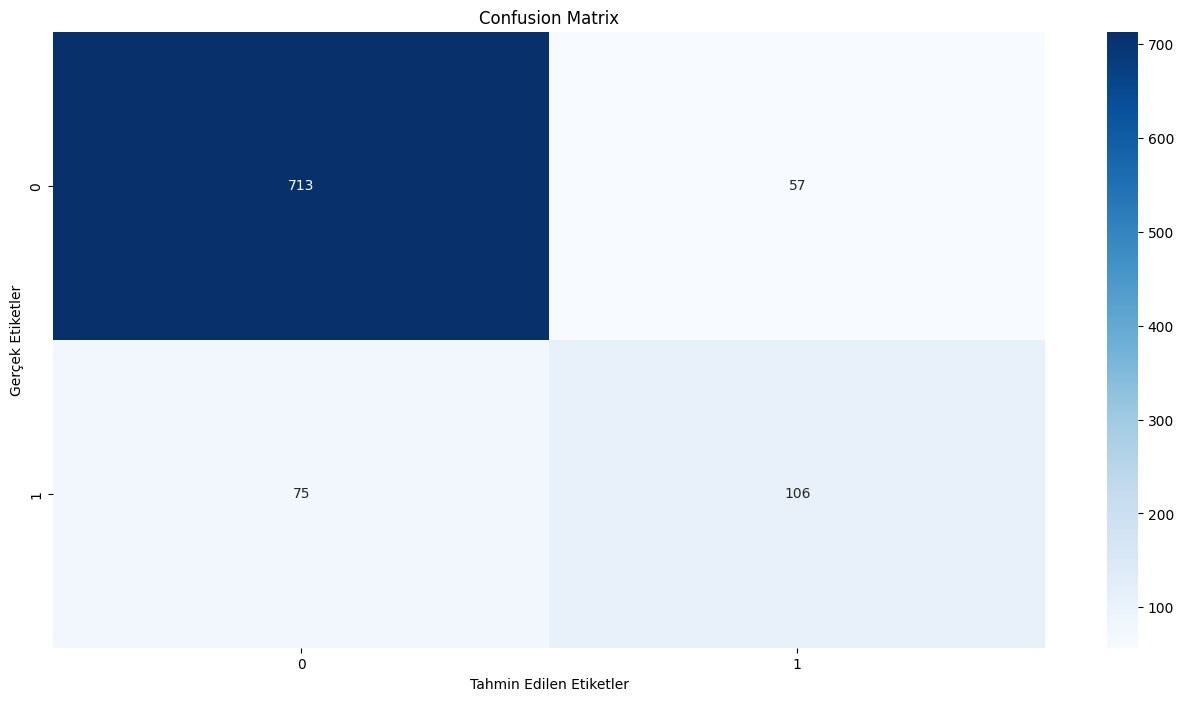

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [272]:
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

Doğruluk: 0.861198738170347


In [273]:
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)

Doğruluk: 0.861198738170347
Kesinlik: 0.6503067484662577
Hassasiyet: 0.585635359116022
F1 Skoru: 0.6162790697674418


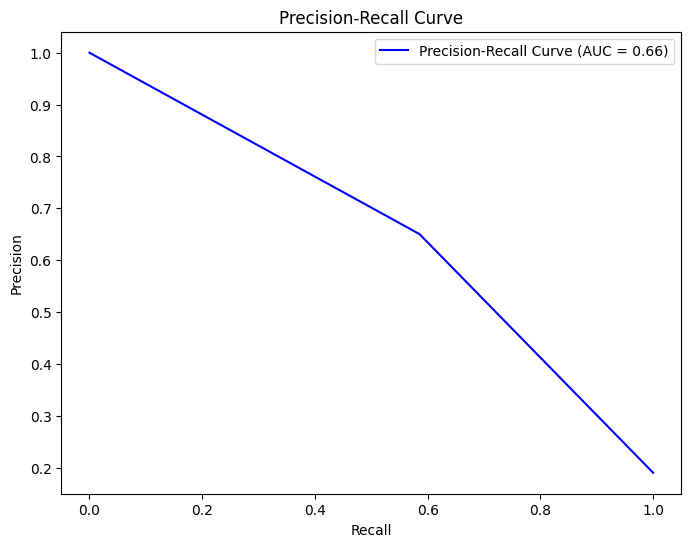

In [274]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

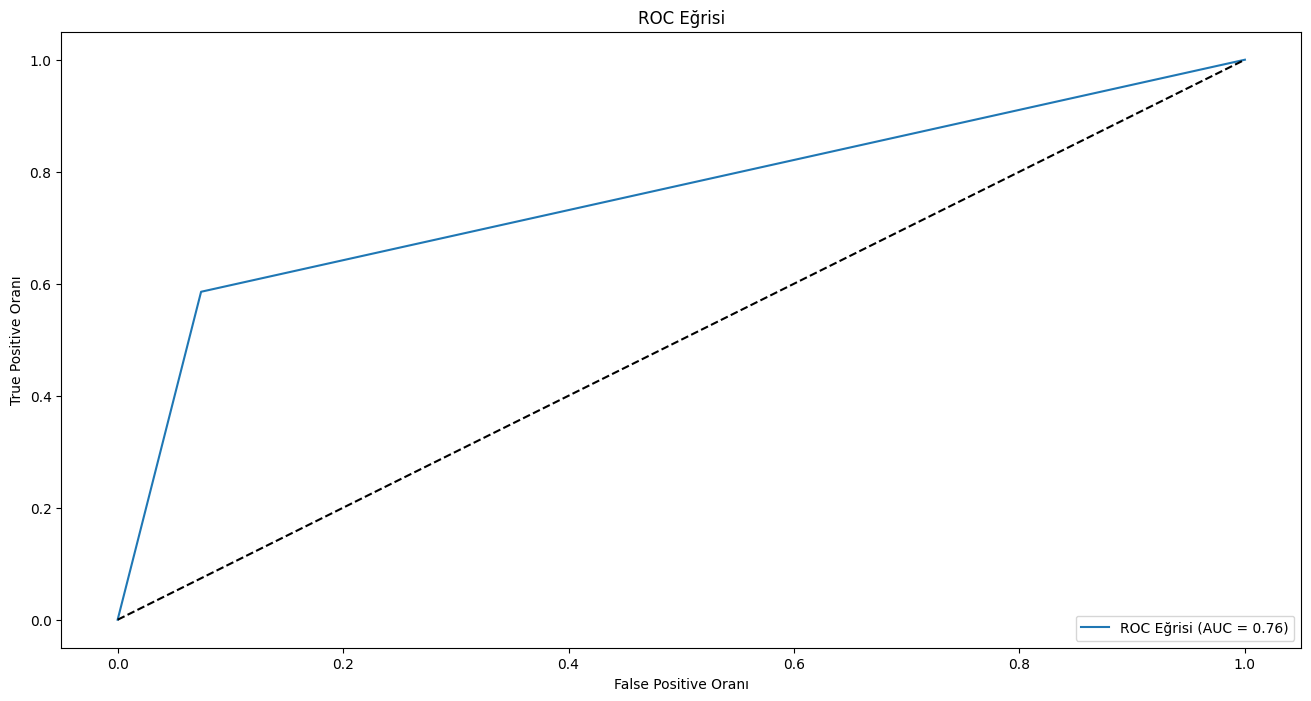

In [275]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC Eğrisi (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

## Random Forest

In [276]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [278]:
from sklearn.ensemble import RandomForestClassifier

classifier_random = RandomForestClassifier(n_estimators = 10, max_samples=0.5, criterion = 'log_loss', random_state=0)

classifier_random.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_samples=0.5, n_estimators=10,
                       random_state=0)

In [279]:
y_pred = classifier_random.predict(X_test)

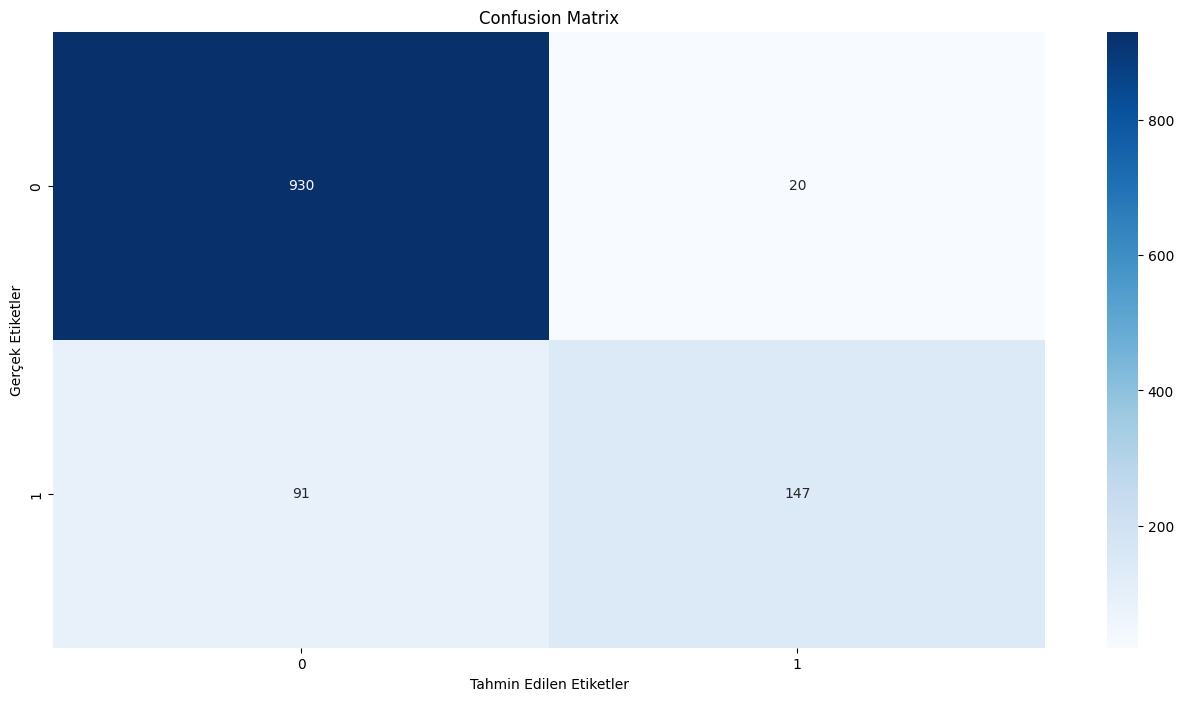

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

In [281]:
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk:", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)

Doğruluk: 0.9065656565656566
Kesinlik: 0.8802395209580839
Hassasiyet: 0.6176470588235294
F1 Skoru: 0.7259259259259261


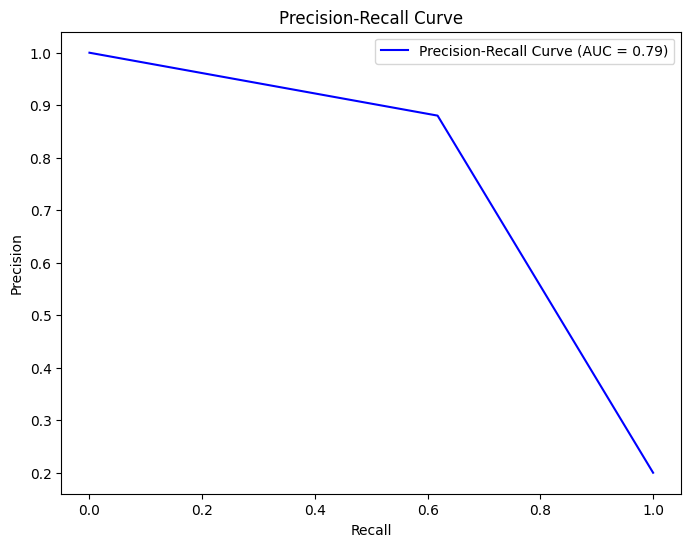

In [282]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

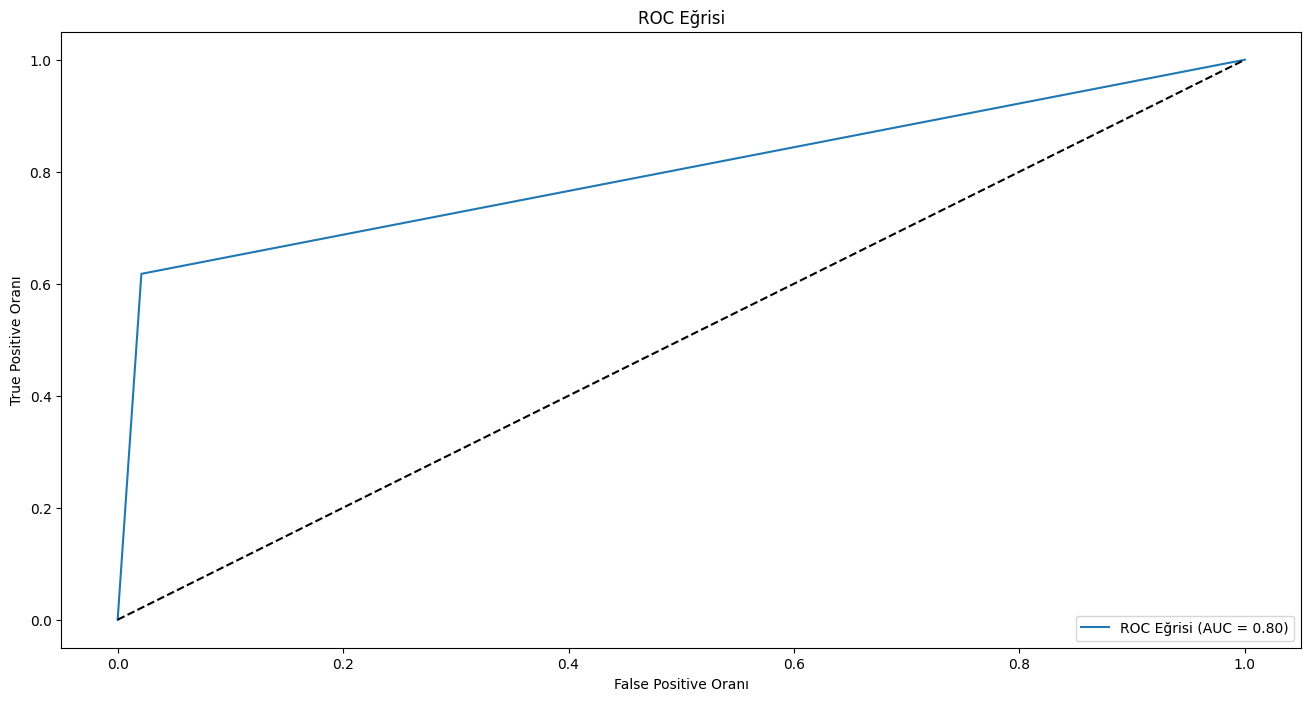

In [283]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC Eğrisi (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

## Test

In [284]:
test = pd.read_csv("test2023.csv")

print(test.shape)

(1192, 13)


## Test Outlier

In [285]:
# Belirtilen indeksleri içeren bir liste
index_list = [373, 673, 959, 1070, 518]


# Veri çerçevesinden belirtilen indeksleri çıkart
test = test.drop(index=index_list)

## NULL DEGERLER

In [286]:
test["MORTDUE"] = test['MORTDUE'].fillna(0)
test["VALUE"] = test["VALUE"].fillna(0)
test["YOJ"] = test["YOJ"].fillna(0)
test["DEROG"] = test["DEROG"].fillna(0)
test["DELINQ"] = test["DELINQ"].fillna(0)
test["CLAGE"] = test["CLAGE"].fillna(0)
test["NINQ"] = test["NINQ"].fillna(0)
test["CLNO"] = test["CLNO"].fillna(0)
test["DEBTINC"] = test["DEBTINC"].fillna(0)

test['REASON'] = test['REASON'].fillna(test['REASON'].mode()[0])
test['JOB'] = test['JOB'].fillna(test['JOB'].mode()[0])

## Skewness

In [287]:
from scipy.stats import skew
#Sayisal Sutunlara erismek icin
numeric_feats = test.dtypes[test.dtypes != "object"].index

#her bir sayısal özelliğin Skewness(çarpıklığını) hesaplamak için
skewed_feats = test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
DELINQ,4.998820
DEROG,4.615356
NINQ,2.523906
LOAN,2.148318
VALUE,1.920010
MORTDUE,1.790673
YOJ,1.041320
DEBTINC,0.659011
CLNO,0.615895
CLAGE,0.613911


In [288]:
from scipy.special import boxcox1p
#çarpıklık değeri 0.75'ten büyük olan özellikleri seçer. 
#Bu eşik değeri (0.75), genellikle çarpıklık değerini düzeltebilecek bir dönüşüm sınırını temsil eder.
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index

#Box-Cox dönüşüm parametresi olan lambda (λ) değerini belirtir.
lam = 0.15

#Sutunlara Box-Cox dönüşümünü uygular.
for feat in skewed_features:
    test[feat] = boxcox1p(test[feat], lam)

There are 11 skewed numerical features to Box Cox transform


## Encoding

In [289]:
cat_columns_all_data = ["REASON", "JOB"]

test = pd.get_dummies(test, columns=cat_columns_all_data, drop_first=True)

In [290]:
bool_columns = ["REASON_HomeImp", "JOB_Office", "JOB_Other", "JOB_ProfExe", "JOB_Sales", "JOB_Self"]
test[bool_columns] = test[bool_columns].astype(int)

In [291]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, 0 to 1191
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1187 non-null   float64
 1   DEBTINC         1187 non-null   float64
 2   LOAN            1187 non-null   float64
 3   MORTDUE         1187 non-null   float64
 4   VALUE           1187 non-null   float64
 5   YOJ             1187 non-null   float64
 6   DEROG           1187 non-null   float64
 7   DELINQ          1187 non-null   float64
 8   CLAGE           1187 non-null   float64
 9   NINQ            1187 non-null   float64
 10  CLNO            1187 non-null   float64
 11  REASON_HomeImp  1187 non-null   int32  
 12  JOB_Office      1187 non-null   int32  
 13  JOB_Other       1187 non-null   int32  
 14  JOB_ProfExe     1187 non-null   int32  
 15  JOB_Sales       1187 non-null   int32  
 16  JOB_Self        1187 non-null   int32  
dtypes: float64(11), int32(6)
memory usage:

## RANDOM FOREST

In [292]:
test = sc.transform(test)

c:\Users\mahsu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [293]:
y_pred_unseen = classifier_random.predict(test)
y_pred_unseen

array([0, 0, 1, ..., 1, 1, 0])

In [294]:
y_pred_unseen_df = pd.DataFrame(y_pred_unseen, columns=["Tahmini_Output"])
y_pred_unseen_df.head(10)

,Tahmini_Output
0,0
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [295]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred_unseen are NumPy arrays or lists
min_length = min(len(y_test), len(y_pred_unseen))

precision = precision_score(y_test[:min_length], y_pred_unseen[:min_length])
recall = recall_score(y_test[:min_length], y_pred_unseen[:min_length])
f1 = f1_score(y_test[:min_length], y_pred_unseen[:min_length])

print("Precision:", precision)
print("Recall:", recall)
print("F1 Skoru:", f1)


Precision: 0.20361990950226244
Recall: 0.759493670886076
F1 Skoru: 0.3211418376449599


In [296]:
print(len(y_test), len(y_pred_unseen))


1188 1187


In [297]:
index_values = range(1, len(y_pred_unseen) + 1)

In [298]:
sub = pd.read_csv('sample_submission.csv')


In [299]:
test_pred_df = pd.DataFrame(y_pred_unseen, columns=["BAD"])

result_lgb = pd.concat([sub['index'],test_pred_df], axis=1)

result_lgb.fillna(0, inplace=True)

result_lgb.to_csv('submission.csv', index=False)

In [300]:
# test_pred adlı bir değişkeni önce tanımlayın veya uygun bir değerle atayın
test_pred = [0.5, 0.7, 0.3, ...]  # Örnek bir liste

# Geri kalan kodları çalıştırın
submission = pd.read_csv("sample_submission.csv")
test_pred_df_lgb = pd.DataFrame(test_pred, columns=["SalePrice"])
result_lgb = pd.concat([submission['index'], test_pred_df_lgb], axis=1)
result_lgb.to_csv('submission_xgb_fin.csv', index=False)

In [301]:
submission=pd.read_csv("sample_submission.csv")
test_pred_df_lgb = pd.DataFrame(test_pred, columns=["SalePrice"])

result_lgb = pd.concat([submission['index'],test_pred_df_lgb], axis=1)

result_lgb.to_csv('submission_xgb_fin.csv', index=False)